In [1]:
from sisyphus2.backend.models.basic import Basic, BasicSigmoid, BasicScan
from sisyphus2.backend.models.lstm import LSTM
from sisyphus2.tasks import rdm as rd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
rdm = rd.RDM(N_in = 2, N_out = 2, dt = 10, tau = 100, T = 2000, N_batch = 128)
gen = rdm.batch_generator()

In [3]:
params = rdm.__dict__

In [5]:
params = dict()

In [6]:
params['name'] = 'model'
params['N_rec'] = 50

In [7]:
model = Basic(params)

You must pass 'N_in' to RNN


KeyError: 'N_in'

In [9]:
model.build()
model.train(gen, {'save_weights_path': '../weights/refactor_weights.npz', 'training_iters': 10000})

Iter 1280, Minibatch Loss= 0.167348
Iter 2560, Minibatch Loss= 0.126378
Iter 3840, Minibatch Loss= 0.125831
Iter 5120, Minibatch Loss= 0.129202
Iter 6400, Minibatch Loss= 0.120079
Iter 7680, Minibatch Loss= 0.129025
Iter 8960, Minibatch Loss= 0.113439
Optimization finished!
Model saved in file: ../weights/refactor_weights.npz


([0.16734761,
  0.12637751,
  0.12583135,
  0.12920219,
  0.12007873,
  0.12902483,
  0.11343858],
 46.464597940444946,
 75.59938597679138)

In [10]:
x,y,m = gen.next()

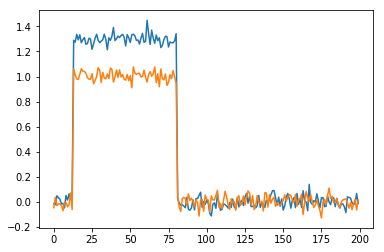

In [11]:
plt.plot(x[0,:,:])

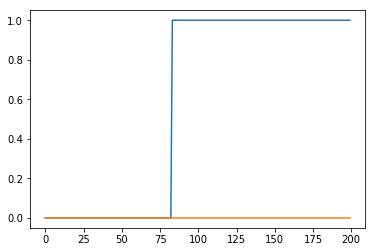

In [12]:
plt.plot(y[0,:,:])

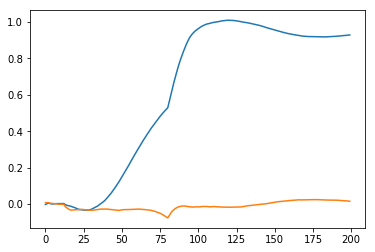

In [13]:
plt.plot(model.test(x)[0][0,:,:])

In [7]:
model.destruct()

In [14]:
params['david']

KeyError: 'david'